In [2]:
## importing neceessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data ingestion and EDA

In [3]:
from pathlib import Path
csv_path = Path.cwd() / "data" / "StudentsPerformance.csv"
df = pd.read_csv(csv_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [65]:
average_score = df[['writing score','math score','reading score']].sum(axis=1)/3
df['average_score'] = average_score

In [7]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [67]:
for col in cat_col:
    print(f"Unique values of {col}: ",end="")
    print(df[col].unique())
    print("------------------")

Unique values of gender: ['female' 'male']
------------------
Unique values of race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
------------------
Unique values of parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------
Unique values of lunch: ['standard' 'free/reduced']
------------------
Unique values of test preparation course: ['none' 'completed']
------------------


In [68]:
average_score_by_gender = df.groupby('gender')['average_score'].mean()

In [69]:
full_marks_math = len(df[df['math score']==100])
full_marks_reading = len(df[df['reading score']==100])
full_marks_writing = len(df[df['writing score']==100])
perfect_score = df[average_score==100]


<Axes: ylabel='Count'>

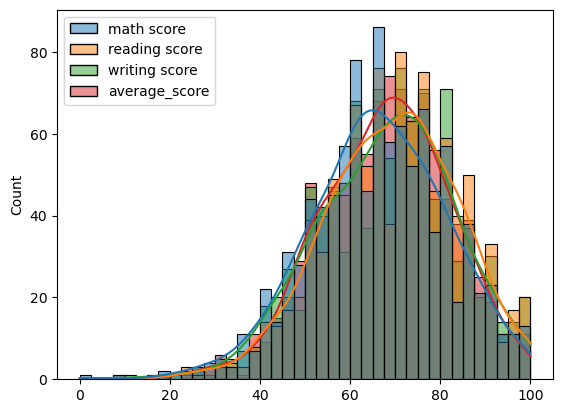

In [70]:
sns.histplot(df,kde=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2912\4233089178.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


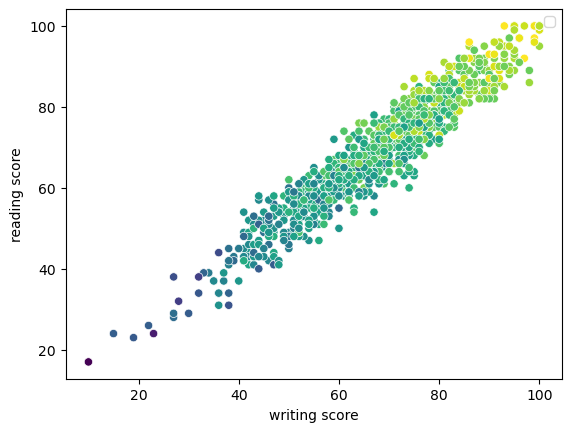

In [76]:
sns.scatterplot(x='writing score',y='reading score',data=df,c=df['math score'])
plt.legend()

In [77]:
df[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


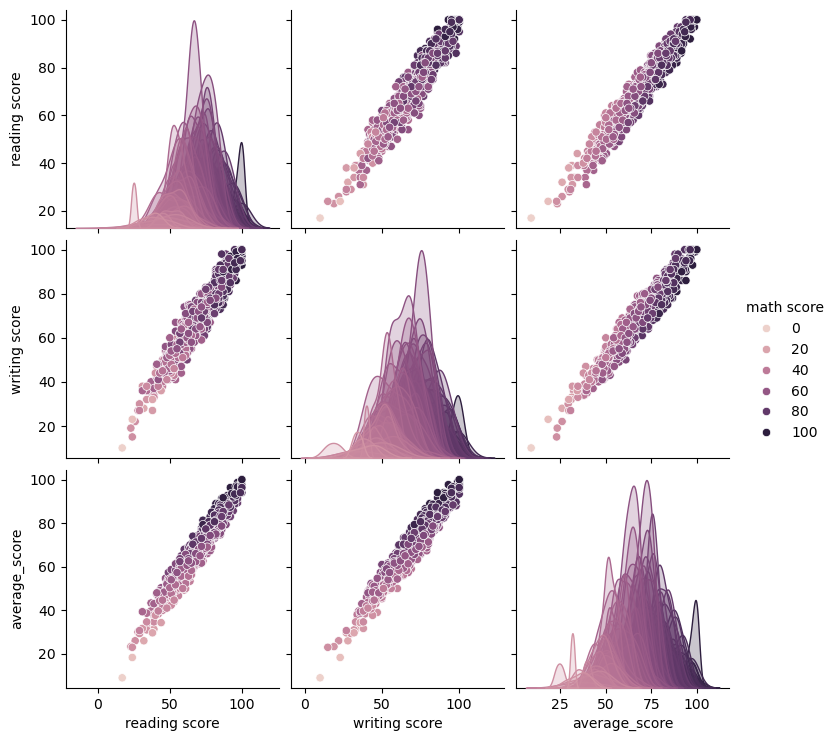

In [ ]:
sns.pairplot(df,hue='math score')

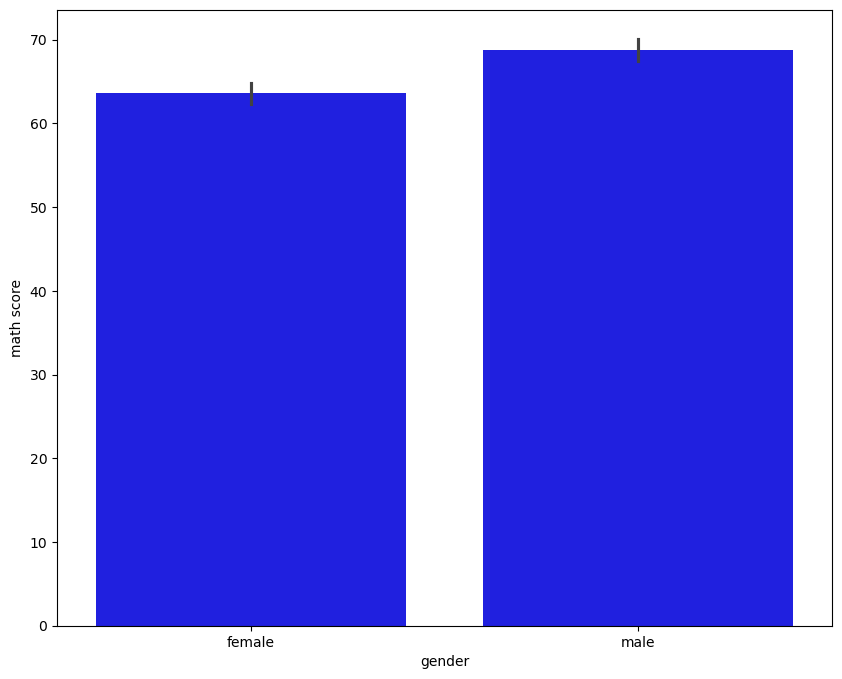

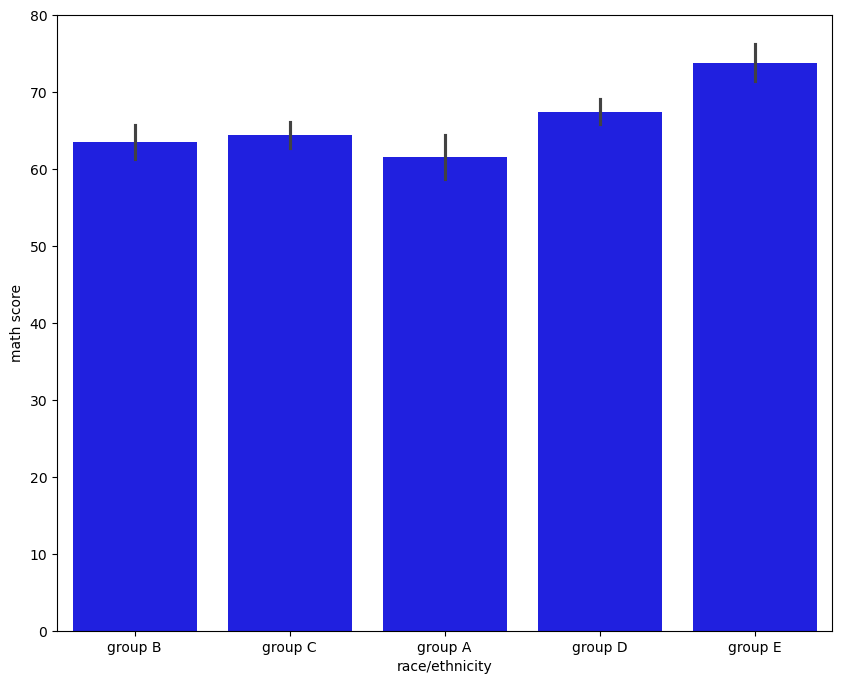

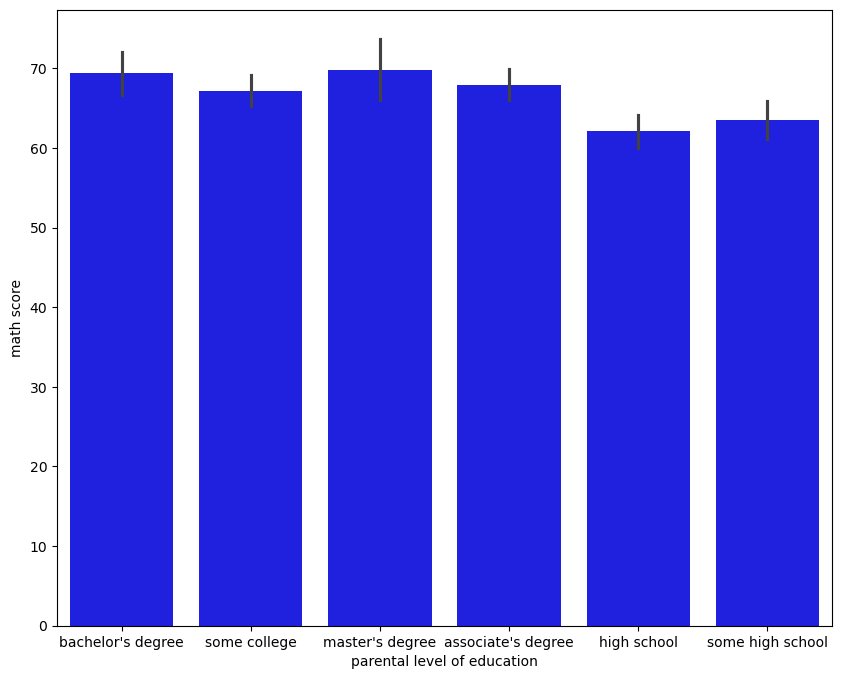

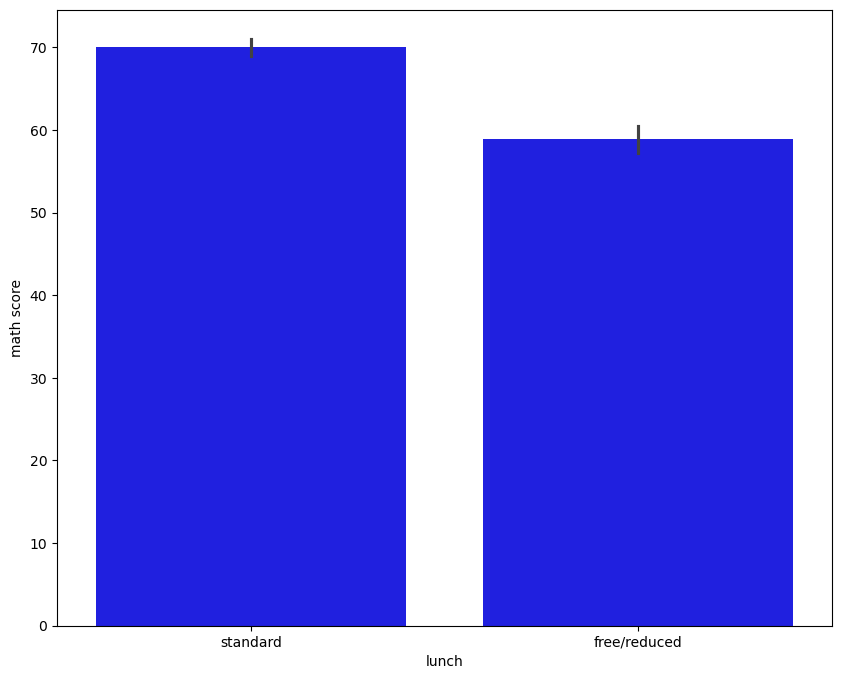

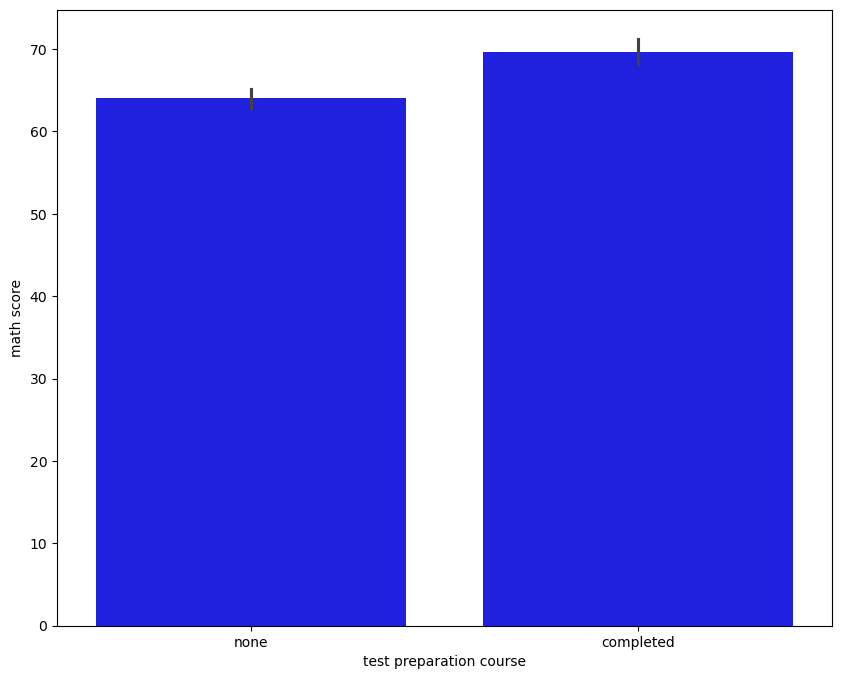

In [ ]:
for col in cat_col:
    plt.figure(figsize=(10,8))
    sns.barplot(x=df[col],y=df['math score'],color='blue',)

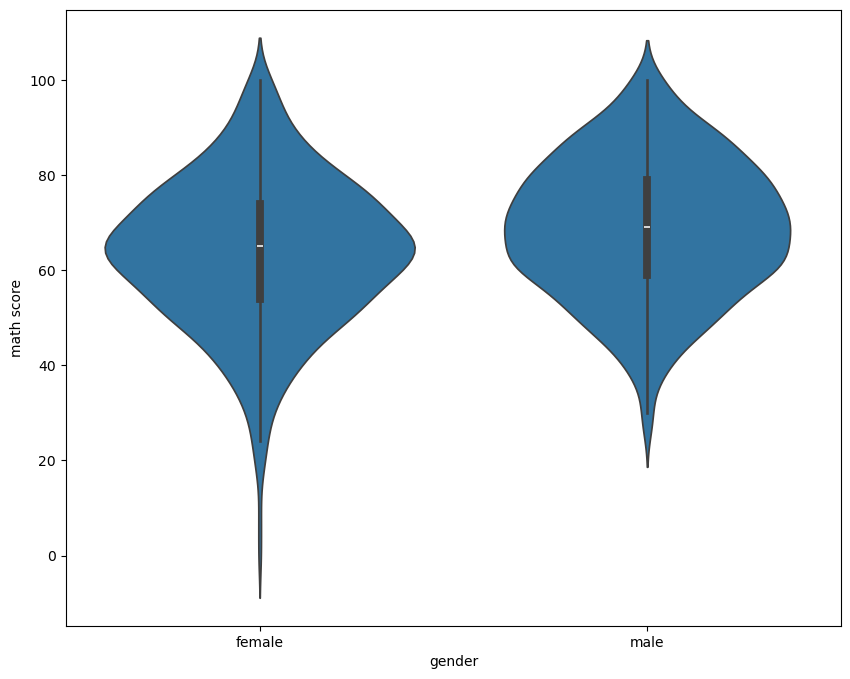

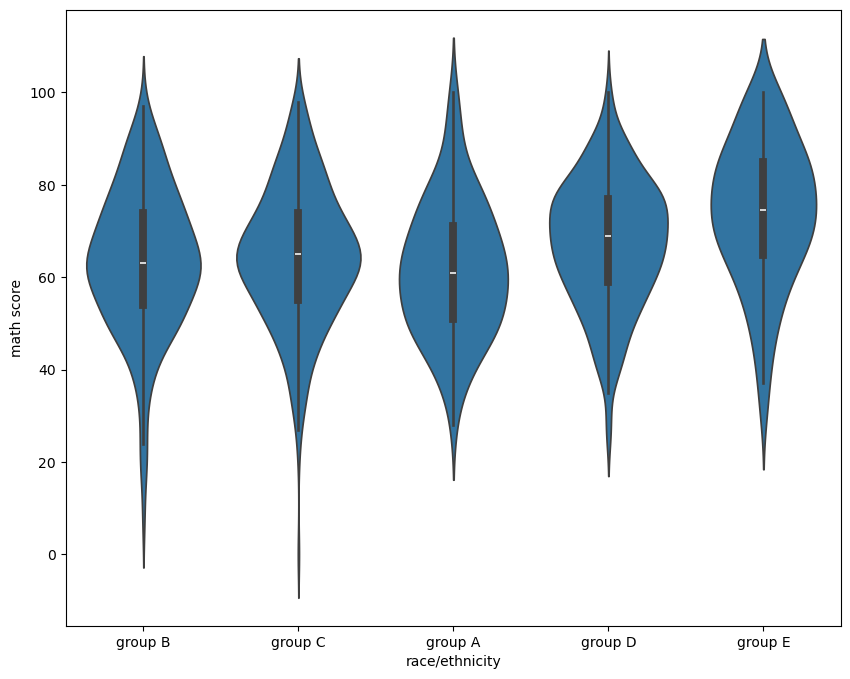

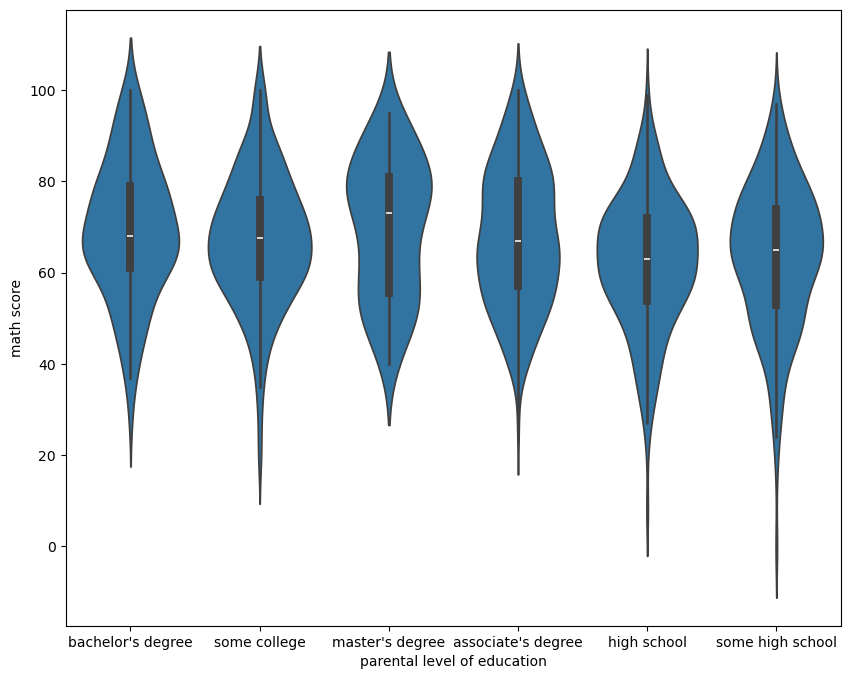

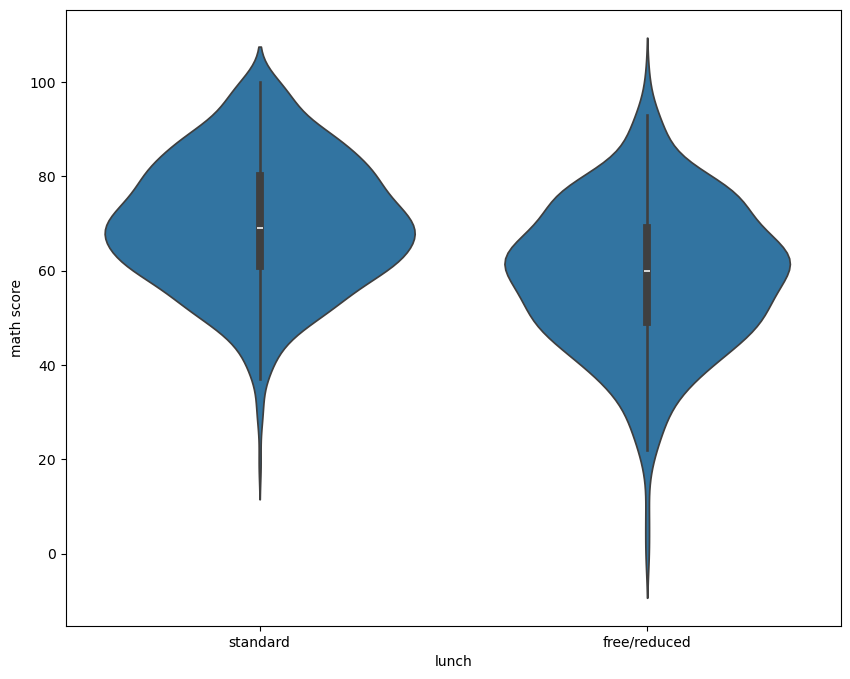

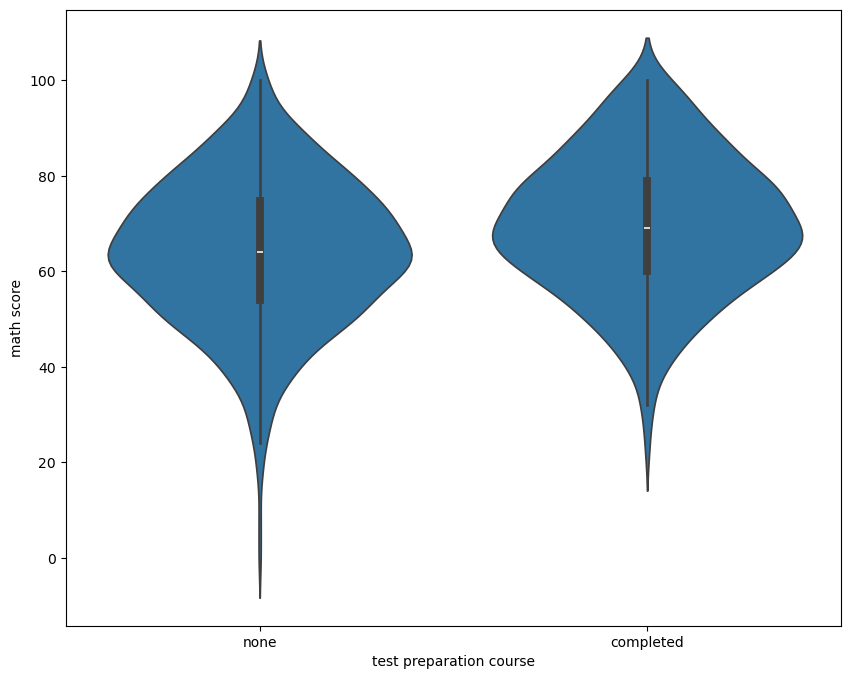

In [90]:
for col in cat_col:
    plt.figure(figsize=(10,8))
    sns.violinplot(x=df[col],y=df['math score'])

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')